# Figures for the paper

In [2]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [3]:
import PIL.Image as Image
import pickle

In [4]:
with open("../SpineModel/dis_baseline.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
    
with open("../SpineModel/electrotonicL.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)
    

In [5]:
def plot_trace(data,t,ax=None,c='C0',band= None):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

In [6]:
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,c='C0')
#xlim(0,100)

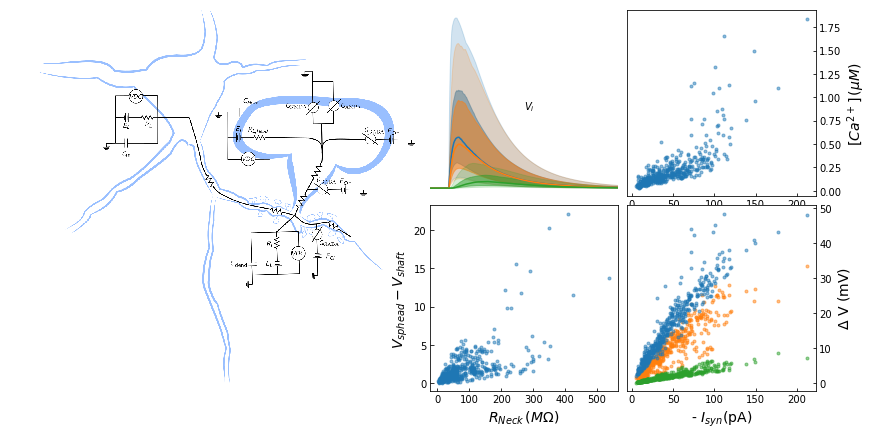

In [7]:
im = Image.open('../NeuronA.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255
fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(2, 4,  wspace=0.05, hspace=0.05) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0:2]) # first full col
ax1 = fig.add_subplot(gs[0, 2]) # first row, second col
ax4 = fig.add_subplot(gs[0, 3]) # first row, third col
ax2 = fig.add_subplot(gs[1, 2]) # 2nd row, second col
ax3 = fig.add_subplot(gs[1, 3]) # 2nd row, 3rd col

ax0.imshow(im)
ax0.set_axis_off()
#ax2.imshow(im)
#ax3.imshow(im)
#ax4.imshow(im)
#ax5.imshow(im)
#ax1.imshow(im)
plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax1,c='C0')
plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax1,c='C1')
ax1.set_xlim(0,100)
ax1.set_ylim(-67,-20)
ax1.set_axis_off()
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax2,c='C1')
#plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax2,c='C2')
ax1.text(50,20-65,"$V_{i}$")

plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax1,c='C2')
#ax2.set_xlim(0,100)
#ax2.set_axis_off()
#plot_trace(vtracs-vtracsD,arange(vtracs.shape[0])*.1-200+10,ax2,c='C0')
#ax2.set_xlim(0,100)
#ax2.set_axis_off()
#ax2.set_ylim(-2,40)
#ax2.text(50,4,"$V_{sp head} - V_{d}$")

sel = mes[:,0].argsort()

ax2.plot(abs(mes[sel,0]),mes[sel,1]-mes[sel,2],'.',label="Spine head",alpha=0.5)

ax2.set_xlabel("$R_{Neck}\, (M\Omega)$",fontsize = 14)
ax2.set_ylabel("$V_{sp head}-V_{shaft}$",fontsize = 14)
#ax2.set_xscale("log")
#ax2.set_yscale("log")


#plot_trace(Ctracs,arange(Ctracs.shape[0])*.1-200+10,ax4,c='C0')
ax4.plot(abs(mes[sel,-3]/1e-3),mes[sel,4],'.',label="Spine head",alpha=0.5)
ax4.set_xlabel("$-I_{syn}\, (pA)$",fontsize = 14)
ax4.set_ylabel("$[Ca^{2+}]\, (\mu M)$",fontsize = 14)
#ax4.set_xscale("log")
#ax4.set_yscale("log")
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
#ax4.set_xlim(0,200)
#ax4.set_axis_off()
#ax4.set_ylim(-0.1,8.0)
#ax3.set_ylim(-2,40)
#ax2.set_axis_off()
#ax4.text(120,4,"$Ca^{2+}$")

sel = mes[:,-3].argsort()
ax3.plot(abs(mes[sel,-3]/1e-3),me2[sel,4]+65,'C1.',label="Dendritic shaft",alpha=0.5)
ax3.plot(abs(mes[sel,-3]/1e-3),mes[sel,1]+65,'C0.',label="Spine head",alpha=0.5)
ax3.plot(abs(mes[sel,-3]/1e-3),mes[sel,3]+65,'C2.',label="Soma",alpha=0.5)
ax3.set_xlabel("- $I_{syn}$(pA)",fontsize = 14)
ax3.set_ylabel("$\Delta$ V (mV)",fontsize = 14)
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")

ax3.tick_params(direction="in")
ax4.tick_params(which='both',direction="in")
ax2.tick_params(direction="in")

savefig("Figure_Model_1.png")

In [8]:
(mes[sel,3]+65).mean()

2.007428649518068

Figure 1. Panel a shows sketch of circuit model used for  ..... each compartment includes passive membrane properties, active conductances such as Voltage dependent Calcium currents, etc. Inside the spine, the model includes an excitatory synapse with both AMPA and NMDA currents and the possibility of having second innervation with a GABAergic synapse. Inhibitory synapses can be located in the dendritic shaft or in the spine neck as well. Panel b shows the depolarization produced in the membrane of the spine head (blue) and in the dendritic shaft (orange), when (only) glutamate release is simulated. Panel c shows the depolarization of the dendritic shaft and the soma in the same scenario. Panel d shows the amplitude of the depolarization in the ensemble of spines as a function of the amplitude of the current. Panel e shows the effects of the EPSP in the intracellular Calcium in the previous scenario (blue) and when NMDA currents is blocked (orange).  

In [9]:
data = {}
with open("../SpineModel/dis_baseline.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open("../SpineModel/dis_ga_glu05.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open("../SpineModel/dis_glu_ga05.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
#with open("sis_ga_glu.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gaglu"] = [vtracs,Ctracs]
#with open("sis_glu_ga.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gluga"] = [vtracs,Ctracs]

with open("inhibition_sis_01.pickle","rb") as f:
    tdels,inhtimSis,_,tauSis = pickle.load(f)
with open("inhibition_dis.pickle","rb") as f:
    tdels,inhtimDis,_,tauDis = pickle.load(f)

In [10]:
from matplotlib.patches import ConnectionPatch

In [16]:
def gbar(ax, x, y, width=0.5, top=0.1):
    X = [[.6, .6], [.7, .7]]
    for left, bottom in zip(x, y):
        right = left + width
        ax.imshow(X, interpolation='bicubic', cmap=cm.Blues,
                  extent=(left, right, bottom, top), alpha=1)
        

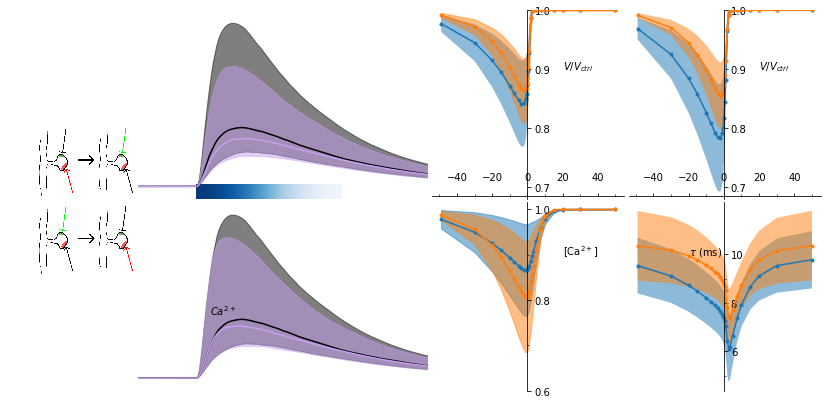

In [58]:
#height = im.size[1]
#im = np.array(im).astype(np.float) / 255
im = Image.open('spines_inhandex.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255

fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(6,8,  wspace=0.05, hspace=0.05) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0]) # first full col

ax1 = fig.add_subplot(gs[:3, 1:4]) # first row, second col
ax3 = fig.add_subplot(gs[3:, 1:4]) # 2nd row, second col

ax2 = fig.add_subplot(gs[:3, 4:6]) # first row, third col
ax4 = fig.add_subplot(gs[3:, 4:6]) # first full col
ax0b = fig.add_subplot(gs[3:, 6:]) # 2nd row, 3rd col
ax5 = fig.add_subplot(gs[:3, 6:]) # 2nd row, 3rd col

ax0.imshow(im)
#ax.text(0.5,5,"in soma/dendrite")
ax0.set_axis_off()

#ax0.imshow(im)
#ax0.set_axis_off()
#ax2.imshow(im)
#ax3.imshow(im)
#ax4.imshow(im)
#ax5.imshow(im)
#ax1.imshow(im)
#vtracs = data["dis_baseline"][0]
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax0,c='k')
ax0.set_axis_off()
#ax0b.set_axis_off()

vtracs = data["dis_baseline"][1]
plot_trace(vtracs,arange(vtracs.shape[0])*.1-200,ax1,c='k',band = 1)
#ax0.set_xlim(0,100)
#ax0.text(50,20-65,"glu-GABA")


#vtracs = data["dis_baseline"][0]
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax0,c='gray')
vtracs = data["dis_gaglu"][1]
plot_trace(vtracs,arange(vtracs.shape[0])*.1-200,ax1,c='#c79fef',band = 1)
ax1.set_xlim(0,200)
ax1.set_axis_off()
#ax1.text(50,20-65,"GABA-glu")

vtracs = data["dis_baseline"][1]
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax3,c='k')
#vtracs = data["dis_gaglu"][1]
plot_trace(vtracs,arange(vtracs.shape[0])*.1-200,ax3,c='k',band = 1)
ax3.set_xlim(0,200)
#ax1.set_ylim(-67,-20)
ax3.set_axis_off()
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax2,c='C1')
#plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax2,c='C2')
#ax3.text(50,4,"$Ca^{2+}$")

#vtracs = data["dis_baseline"][1]
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax3,c='k')
vtracs = data["dis_gluga"][1]
plot_trace(vtracs,arange(vtracs.shape[0])*.1-200,ax3,c='#c79fef',band = 1)
ax3.set_xlim(0,200)
#ax1.set_ylim(-67,-20)
ax3.set_axis_off()
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax2,c='C1')
#plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax2,c='C2')
ax3.text(50,1,"$Ca^{2+}$")

vm,sv = inhtimSis[:,0],inhtimSis[:,0+4]
ax2.plot(tdels,vm,'C0.-',label='V')
ax2.fill_between(tdels,vm+sv,vm-sv,alpha=0.5)

vm,sv = inhtimSis[:,3],inhtimSis[:,3+4]
ax4.plot(tdels,vm,'C0.-',label='Ca')
ax4.fill_between(tdels,vm+sv,vm-sv,alpha=0.5,color='C0')
#ax2.set_axis_off()

vm,sv = inhtimDis[:,0],inhtimDis[:,0+4]
ax2.plot(tdels,vm,'C1.-',label='V')
ax2.fill_between(tdels,vm+sv,vm-sv,color='C1',alpha=0.5)
ax2.set_ylim(0.68,1.0)

vm,sv = inhtimDis[:,3],inhtimDis[:,3+4]
ax4.plot(tdels,vm,'C1.-',label='Ca')
ax4.fill_between(tdels,vm+sv,vm-sv,color='C1',alpha=0.5)

vm,sv = inhtimSis[:,1],inhtimSis[:,1+4]
ax5.plot(tdels,vm,'C0.-',label='V')
ax5.fill_between(tdels,vm+sv,vm-sv,alpha=0.5)

vm,sv = inhtimDis[:,1],inhtimDis[:,1+4]
ax5.plot(tdels,vm,'C1.-',label='V')
ax5.fill_between(tdels,vm+sv,vm-sv,alpha=0.5)

ax5.set_ylim(0.68,1.0)

#ax0btwin = ax0b.twinx()
#vm,sv = tauDis[:,2],tauDis[:,3]
#ax0btwin.plot(tdels,vm,'C1.-',label='In spine head')
##ax4twin.fill_between(tdels,vm+sv,vm-sv,color='C1',alpha=0.5)

vm,sv = tauSis[:,0],tauSis[:,1]
ax0b.plot(tdels,vm,'C0.-',label='Out spine head')
ax0b.fill_between(tdels,vm+sv,vm-sv,alpha=0.5)

vm,sv = tauDis[:,0],tauDis[:,1]
ax0b.plot(tdels,vm,'C1.-',label='In spine head')
ax0b.fill_between(tdels,vm+sv,vm-sv,alpha=0.5)







ax2.spines['left'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.set_yticks(ticks=[0.7,0.8,0.9,1.0])
#ax2.set_xticks(ticks=arange(-50,70,20))
ax2.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax2.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax2.tick_params(axis='x', pad = 10)
ax2.yaxis.tick_right()
ax2.xaxis.tick_top()
# Eliminate upper and right axes
ax2.spines['right'].set_position(('data',0.0))
ax2.spines['top'].set_position(('data',0.685))
ax2.annotate('$V/V_{ctrl}$ ',xy = (20,0.9))


ax4.spines['left'].set_color('none')
ax4.spines['bottom'].set_color('none')
ax4.set_yticks(ticks=[0.6,0.8,1.0])
#ax4.set_xticks(ticks=[0])
ax4.yaxis.set_minor_locator(FixedLocator(arange(0.7,1.1,0.2)))
#ax4.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))

ax5.spines['left'].set_color('none')
ax5.spines['bottom'].set_color('none')
ax5.set_yticks(ticks=[0.7,0.8,0.9,1.0])
#ax2.set_xticks(ticks=arange(-50,70,20))
ax5.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax5.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax5.tick_params(axis='x', pad = 10)
ax5.yaxis.tick_right()
ax5.xaxis.tick_top()
# Eliminate upper and right axes
ax5.spines['right'].set_position(('data',0.0))
ax5.spines['top'].set_position(('data',0.685))
ax5.annotate('$V/V_{ctrl}$ ',xy = (20,0.9))


ax4.yaxis.tick_right()
#ax4.xaxis.tick_top()

# Eliminate upper and right axes
ax4.spines['right'].set_position(('data',0.0))
#ax4.spines['top'].set_position(('data',1.0))
ax4.spines['top'].set_color('none')
ax4.xaxis.set_visible(False)
ax4.annotate('$[{\\rm Ca}^{2+}]$ ',xy = (20,0.9))

ax0b.spines['left'].set_color('none')
ax0b.spines['bottom'].set_color('none')
ax0b.yaxis.set_minor_locator(FixedLocator(arange(3,11,2)))
ax0b.yaxis.set_major_locator(FixedLocator(arange(4,12,2)))

#ax2.set_xticks(ticks=arange(-50,70,20))
ax0b.tick_params(axis='x', pad = 10)
ax0b.yaxis.tick_right()
#ax0b.xaxis.tick_top()
# Eliminate upper and right axes
ax0b.spines['right'].set_position(('data',0.0))
ax0b.spines['top'].set_color('none')
ax0b.xaxis.set_visible(False)
ax0b.annotate('$\\tau$ (ms)',xy = (-20,10))


ax1.set(autoscale_on=False)
ax1.set(ylim=(-0.2,2.8),autoscale_on=False)
ax3.set(ylim=(-0.2,2.8),autoscale_on=False)
#ax1.plot(linspace(50,100),linspace(10,20)*0+2)
gradient_bar(ax1,[40],[-0.2],100.,.030)
ax1.set_aspect('auto')

#gs.tight_layout(fig, rect=[.5,.5, 1, 1], h_pad=0.)#pad=0.4, w_pad=0.5, h_pad=4.0)
#print(xy1,sel)
#subplot_tool()
savefig('f2.png',dpi = 300)

Figure 2. Panel a and b show the voltage depolarization trace inside the spine head when there are concurrent glutamatergic and GABAergic currents in a DiS. In panel a, the glutamatergic current is elicited 10 ms before the GABAergic one, and in panel b the GABAergic current happens 10 ms before. Panel c and d show the effects in the intracellular Calcium in previous scenarios, where panel c correspond to glu-GABA order while panel d to GABA-glu order. Panel e shows the amplitude of the depolarization of the membrane (blue) and of the intracellular Calcium (red) in the spine head when the delay ($t$) varies. Similarly, it shows the effect when the spine is not dually innervated and the inhibitory synapse is in the dendritic shaft next to it (turqoise: voltage; pink: Calcium).  Panel f shows the amplitude of the EPSP measured in the soma as a function of the delayfor both DiS and SiS with an inhibitory synapse nearby, normalized to amplitude 1 when there is no GABAergic current. 

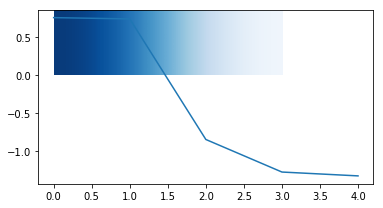

In [30]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0,1.0),direction=1)

plot(randn(5))
ax = gca()
ax.set(autoscale_on=False)
gradient_bar(ax,[0],[0],3.,1.0)
#ax.set_aspect('auto')

In [54]:
with open("electrotonicL.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)
    


mm = me3*1.0
mm = column_stack((me2[:,0],mm))
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = arange(0,10)*7.5
mmn = 1.0*mm
mtn,mtsn = mt,mts

mm = me2*1.0
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = -arange(0,10)*7.5
ms = mean((mes[:,3]+65)/mm[:,0])
mss = std((mes[:,3]+65)/mm[:,0])

In [62]:
with open("gatinginfo_0.pickle","rb") as f:
    fapS,fapD,fap0,fapC = pickle.load(f)
with open("gatinginfo_u.pickle","rb") as f:
    fapSu,fapDu,fap0u,fapCu = pickle.load(f)
with open("gatinginfo_f.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
with open("gatinginfo_h_temp.pickle","rb") as f:
    fapSh,fapDh,fap0h,fapCh,fdath = pickle.load(f)
with open("gatinginfo_inh_electrotonic.pickle","rb") as f:
    shle,shleh,shle0,shleh0  = pickle.load(f)
    

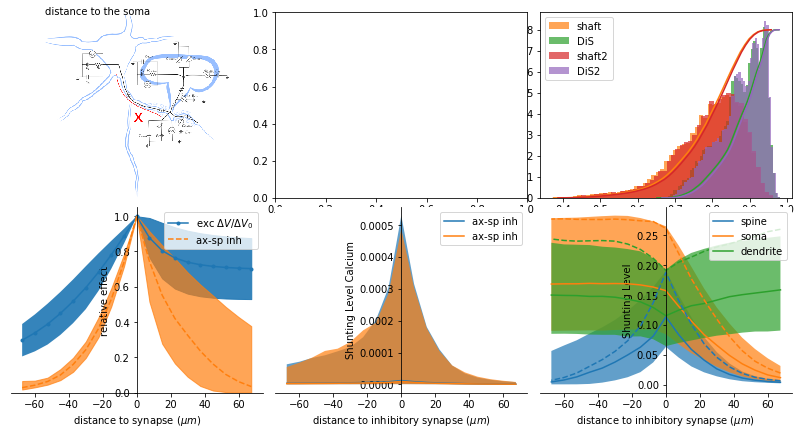

In [80]:
im = Image.open('../distance.png')

fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(2, 3,  wspace=0.05, hspace=0.05) # 2x3 grid
ax0 = fig.add_subplot(gs[0, 0]) # first full col
ax0b = fig.add_subplot(gs[1, 0]) # first full col

ax1 = fig.add_subplot(gs[0, 1]) # first row, second col
ax2 = fig.add_subplot(gs[0, 2]) # first row, third col
ax3 = fig.add_subplot(gs[1, 1]) # 2nd row, second col
ax4 = fig.add_subplot(gs[1, 2]) # 2nd row, 3rd col



#for i in range(500):
#    xe,ye  = 1.0*xt,1.0*mm[i,1:]
#    sel = (ye[1:]-ye[:-1])>=0
#    if sel.sum()>0:
#        sel = 1+arange(9)[sel][0]
#        xe = xe[:sel]
#        ye = ye[:sel]
#    ax0b.plot(xe,ye,'k-',alpha=0.05)
#    
#    xe,ye  = -1.0*xt,1.0*mmn[i,1:]
#    sel = (ye[1:]-ye[:-1])>=0
#    if sel.sum()>0:
#        sel = 1+arange(9)[sel][0]
#        xe = xe[:sel]
#        ye = ye[:sel]
#    ax0b.plot(xe,ye,'k-',alpha=0.05)
    
ax0b.fill_between(xt,mt-mts,mt+mts,alpha=0.9)
ax0b.plot(xt,mt,'C0.-',label='exc $\Delta V/\Delta V_0$')
ax0b.fill_between(-xt,mtn-mtsn,mtn+mtsn,color='C0',alpha=0.9)
ax0b.plot(-xt,mtn,'C0.-')
#axsp = 0
#lab = 'Vspine'
#ax0b.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'C1--',label='ax-dend: $ShntI/ShntI_0$')
#ax0b.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color='C1',alpha=0.7)
axsp = 1
lab = 'Vspine'
# : $ShntI/ShntI_0$
ax0b.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'C1--',label='ax-sp inh')
ax0b.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color='C1',alpha=0.7)
ax0b.legend()
ax0b.set_ylim(0,1.05)
ax0b.spines['left'].set_position(('data',0.0))
ax0b.spines['top'].set_color('none')
ax0b.spines['right'].set_color('none')
ax0b.set_xlabel('distance to synapse ($\mu m$)')
ax0b.set_ylabel('relative effect')
#ax0b.xaxis.set_visible(False)

ax0.imshow(im)
ax0.text(0.5,5,"distance to the soma")
ax0.set_axis_off()

h2 = ax2.hist(fapD[:,1]/fapD[:,0],51,alpha=0.7,label='shaft',color = 'C1',density=True)
ht = ax2.hist(fapD[:,2]/fapD[:,0],51,label='DiS',color = 'C2',density=True,alpha=0.7)
ax2.legend()

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
ax2.plot(htx,hty*8,'C1')

htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
ax2.plot(htx,hty*8,'C2')

h2 = ax2.hist(fap0[:,1]/fap0[:,0],51,alpha=0.7,label='shaft2',color = 'C3',density=True)
ht = ax2.hist(fap0[:,2]/fap0[:,0],51,label='DiS2',color = 'C4',density=True,alpha=0.7)
ax2.legend()

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
ax2.plot(htx,hty*8,'C3')

htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
ax2.plot(htx,hty*8,'C4')


#h2 = ax4.hist((fapDh[:,2]-fapDh[:,1])/fapDh[:,0],51,alpha=0.7,density=True)
#ht = ax4.hist((fapD[:,2]-fapD[:,1])/fapD[:,0],51,alpha=0.7,density=True)
#ax4.text(0.3,4,'$\\frac{V_{DiS}-V_{inh\,out}}{V_{no\,inh}}$',fontsize=14)
#ax4.set_ylim(0,6)

#htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(h2[0])/sum(h2[0])
#ax4.plot(htx,hty*max(ht[0]),'C0')
#p1 = hty[htx>0][0]
#htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(ht[0])/sum(ht[0])
#ax4.plot(htx,hty*max(ht[0]),'C1')
#p2 = hty[htx>0][0]

#print(p1,p2)





#h2 = ax3.hist((fapCh[:,2]-fapCh[:,1])/fapCh[:,0],51,alpha=0.7,density=True)
#ht = ax3.hist((fapC[:,2]-fapC[:,1])/fapC[:,0],51,alpha=0.7,density=True)
#
#htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(h2[0])/sum(h2[0])
#ax3.plot(htx,hty*max(ht[0]),'C0')
#
#htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
#hty = cumsum(ht[0])/sum(ht[0])
#ax3.plot(htx,hty*max(ht[0]),'C1')
#ax3.set_ylim(0,max(ht[0])*1.05)
axsp = 1
for i,lab in enumerate(['Vspine','Vsoma','Vdendrite']):
    ax4.plot(-shle[lab][:,0],shle[lab][:,1+axsp*5],label=lab[1:])
    ax4.fill_between(-shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7)
ax4.spines['left'].set_position(('data',0.0))
ax4.spines['top'].set_color('none')
ax4.spines['right'].set_color('none')
ax4.set_ylabel('Shunting Level')
ax4.set_xlabel('distance to inhibitory synapse ($\mu m$)')
ax4.legend()

axsp = 0
for i,lab in enumerate(['Vspine','Vsoma','Vdendrite']):
    ax4.plot(-shle[lab][:,0],shle[lab][:,1+axsp*5],'C'+str(i)+'--')

axsp = 1
for lab in ['Ca']:
    ax3.plot(-shle[lab][:,0],shle[lab][:,1+axsp*5],label='ax-sp inh')
    ax3.fill_between(-shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7)

axsp = 0
for lab in ['Ca']:
    ax3.plot(-shleh[lab][:,0],shleh[lab][:,1+axsp*5],label='ax-sp inh')
    ax3.fill_between(-shleh[lab][:,0],shleh[lab][:,2+axsp*5],shleh[lab][:,3+axsp*5],alpha=0.7)

ax3.spines['left'].set_position(('data',0.0))
ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.set_ylabel('Shunting Level Calcium')
ax3.set_xlabel('distance to inhibitory synapse ($\mu m$)')
ax3.legend()


savefig('f3.png',dpi = 300)


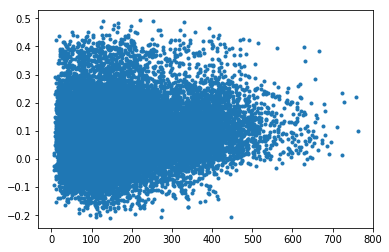

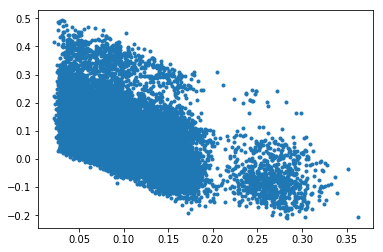

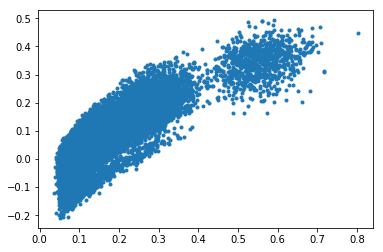

In [419]:
plot(fdatf[:,5]+fdatf[:,4],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')
figure()
plot(fdatf[:,1],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')
figure()
plot(fdatf[:,3],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')

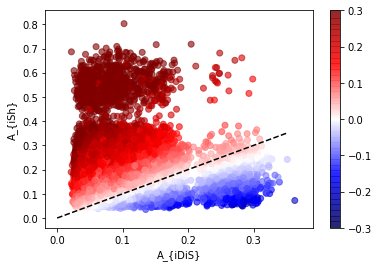

In [429]:
sc = scatter(fdatf[:,1],fdatf[:,3],c= (fap0f[:,2]-fap0f[:,1])/fap0f[:,0],alpha=0.6,cmap='seismic')
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
sc.set_clim(-0.3, 0.3)
plot(linspace(0,0.35),linspace(0,0.35),'k--')

In [434]:
#taken from http://chris35wills.github.io/matplotlib_diverging_colorbar/
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

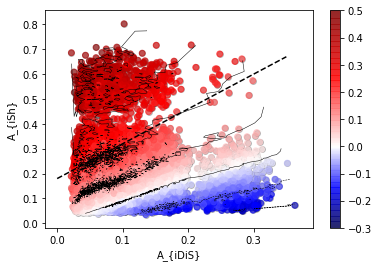

In [458]:
with open("gatinginfo_f.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
#plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
#plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Interpretation: When they have the same area, inhibition in shaft does slightly more effect ~0.003? than when it is in DiS. To have the same effect, A_{ish} should be 15% smaller (0.85 A_{ish}???!)? To have 0.1 more effect, A_{ish} has to be 0.1 um^2 larger than A_{iDiS}. And to have 0.2 more effect A_{ish} = 1.4 A_{iDiS} + 0.18

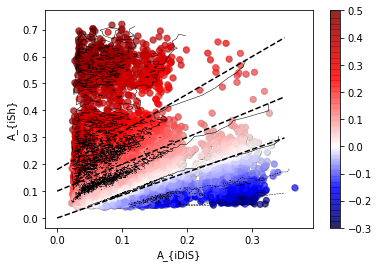

In [459]:
with open("gatinginfo_f_cm1.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

In [484]:
with open("/mnt/data/STDP_baseline_ths.pickle","rb") as f:
    fweights,data,dcs,fcat,dis = pickle.load(f)
tdels = [-100,-75,-50,-30,-20,-15,-10,-7.5,-5,-3.5,-2,-1,-0.5,0,0.5,1.0,2.0,2.75,3.5,5.0,7.5,10.0,15.0,20.,30.,50,75,100]

In [485]:
for fk in fweights.keys():
    thks = list(fweights[fk].keys())
    break
def wdt(i,th1th2,corrected = False):
    a = [[fk,fweights[fk][th1th2][0][i],fweights[fk][th1th2][1][i]] for fk in fweights.keys()]
    a = array(a)
    if corrected:
        a[:,1] = a[:,1]-a[0,1]
    return(a)
def stdpalt(wt, dt = 0.05,gd = 300,gp=700, n = 100):
    gpgd = gp/gd
    
    wf = 0.5
    
    wd = wt[:,1]*n*dt*gd
    wp = wt[:,2]*n*dt*gp
    w = where(wp>0,wp/(wd+wp),0.5*exp(-wt[:,1]*n*dt*gd/20.0/150e3))
    w = w-w[0]
    return(w)


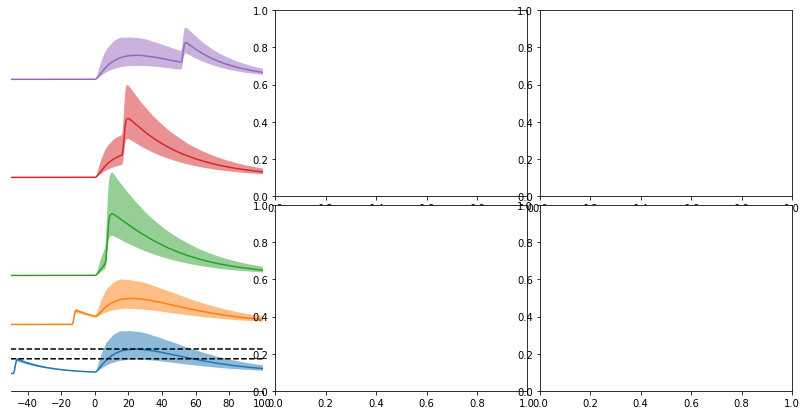

In [492]:
im = Image.open('../distance.png')

fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(2, 3,  wspace=0.05, hspace=0.05) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0]) # first full col

ax1 = fig.add_subplot(gs[0, 1]) # first row, second col
ax2 = fig.add_subplot(gs[0, 2]) # first row, third col
ax3 = fig.add_subplot(gs[1, 1]) # 2nd row, second col
ax4 = fig.add_subplot(gs[1, 2]) # 2nd row, 3rd col


tdelp = [-50,-15,5,15.0,50]
hi = [0,1,2,4.,6.,7.0]
t0 = 300
for i,td in enumerate(tdelp):
    d = fcat[td]
    ax0.plot(d[:,0]-t0,d[:,1]+hi[i])
    ax0.fill_between(d[:,0]-t0,d[:,2]+hi[i],d[:,3]+hi[i],alpha=0.5)
ax0.set_xlim(250-t0,400-t0)
ax0.plot(d[:,0]-t0,d[:,0]*0+.5,'k--')
ax0.plot(d[:,0]-t0,d[:,0]*0+.3,'k--')

#ax0.spines['left'].set_position(('data',0.0))
ax0.spines['left'].set_color('none')
ax0.spines['top'].set_color('none')
ax0.spines['right'].set_color('none')
ax0.yaxis.set_visible(False)

savefig('f4.png')